In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from utilities import visualize_classifier

In [5]:
input_file = 'data_decision_trees.txt'

In [6]:
data = np.loadtxt('./data/' + input_file, delimiter = ',')

In [7]:
X, y = data[:, :-1], data[:, -1]

In [8]:
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])

In [9]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s = 75, facecolors = 'black',
           edgecolors = 'black', linewidth = 1, marker = 'x')
plt.scatter(class_1[:, 0], class_1[:, 1], s = 75, facecolors = 'white', 
           edgecolors = 'black', linewidth = 1, marker = 'o')
plt.title('Input data')

Text(0.5,1,'Input data')

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25, random_state = 5)

In [11]:
params = {'random_state' : 0, 'max_depth' : 4}

In [12]:
classifier = DecisionTreeClassifier(**params)

In [13]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

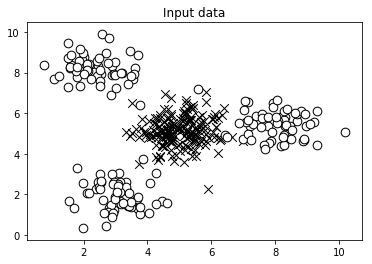

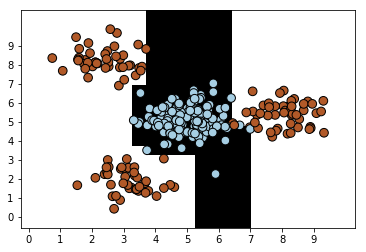

In [15]:
visualize_classifier(classifier, X_train, y_train)

In [16]:
y_test_pred = classifier.predict(X_test)

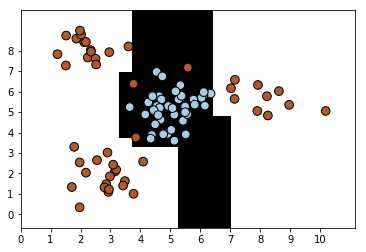

In [19]:
visualize_classifier(classifier, X_test, y_test)

In [20]:
class_names = ['Class-0', 'Class-1']

In [23]:
print('#' * 40)
print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))
print('#' * 40)
print('#' * 40)
print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names = class_names))
print('#' * 40)

########################################
Classifier performance on training dataset
             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################
########################################
Classifier performance on test dataset
             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################
